In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

In [ ]:
# Generate train data
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]

In [ ]:
# Generate some regular novel observations
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]

In [ ]:
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

In [ ]:
# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

In [ ]:
# plot the line, the points, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

In [ ]:
plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.Blues_r)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='orange')
 
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel(
    "error train: %d/200 ; errors novel regular: %d/40 ; "
    "errors novel abnormal: %d/40"
    % (n_error_train, n_error_test, n_error_outliers))
plt.show()

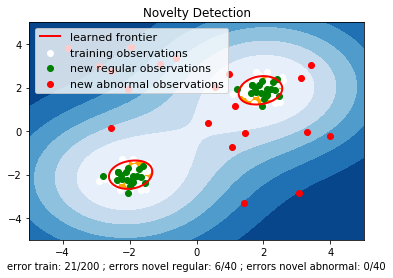

Introduction

The goal of anomaly detection is to identify cases that are unusual within data that is seemingly homogeneous. Anomaly detection is an important tool for detecting fraud, network intrusion, and other rare events that may have great significance but are hard to find.

Outliers are cases that are unusual because they fall outside the distribution that is considered normal for the data. The distance from the center of a normal distribution indicates how typical a given point is with respect to the distribution of the data. Each case can be ranked according to the probability that it is either typical or atypical.

Anomaly detection is a form of classification and is implemented as one-class classification, because only one class is represented in the training data. An anomaly detection model predicts whether a data point is typical for a given distribution or not. An atypical data point can be either an outlier or an example of a previously unseen class. Normally, a classification model must be trained on data that includes both examples and counter-examples for each class so that the model can learn to distinguish between them.
Implementation

Scikit-learn implements One-class SVM algorithm, which detects the soft boundary of that set so as to classify new points as belonging to that set or not. The class that implements this is called OneClassSVM. 

Anomaly detection is applicable in a variety of domains, such as intrusion detection, fraud detection, fault detection, system health monitoring, event detection in sensor networks, and detecting Eco-system disturbances. It is often used in preprocessing to remove anomalous data from the dataset. In supervised learning, removing the anomalous data from the dataset often results in a statistically significant increase in accuracy. 

So